In [2]:
import pandas as pd

In [3]:
df1=pd.read_csv('drugsComTrain_raw.tsv', sep='\t')

In [4]:
df1.shape

(161297, 7)

In [5]:
df2=pd.read_csv('drugsComTest_raw.tsv', sep='\t')

### Drop the Null value

In [6]:
df1.dropna().shape

(160398, 7)

In [7]:
df2.dropna().shape 

(53471, 7)

### Combine the two Dateframe(Train and test)

In [8]:
frames = [df1,df2]
df = pd.concat(frames, keys=['Train', 'Test'])

df

Unnamed: 0                            drugName  \
Train 0          206461                           Valsartan   
      1           95260                          Guanfacine   
      2           92703                              Lybrel   
      3          138000                          Ortho Evra   
      4           35696            Buprenorphine / naloxone   
      5          155963                              Cialis   
      6          165907                      Levonorgestrel   
      7          102654                        Aripiprazole   
      8           74811                              Keppra   
      9           48928  Ethinyl estradiol / levonorgestrel   
      10          29607                          Topiramate   
      11          75612                      L-methylfolate   
      12         191290                             Pentasa   
      13         221320                    Dextromethorphan   
      14          98494                           Nexplanon   
      15          81890                         Liraglutide   
      16          48188                        Trimethoprim   
      17         219869                       Amitriptyline   
      18         212077                         Lamotrigine   
      19         119705                           Nilotinib   
      20          12372                             Atripla   
      21         231466                           Trazodone   
      22         227020                        Etonogestrel   
      23          41928                          Etanercept   
      24         213649                         Tioconazole   
      25          51215                        Azithromycin   
      26         206180                        Eflornithine   
      27          78563                            Daytrana   
      28         132258                              Ativan   
      29          27339                             Imitrex   
...                 ...                                 ...   
Test  53736      176383                           Lorazepam   
      53737      123174                          Azelastine   
      53738      222080                         Fluconazole   
      53739        8173                            Zolpidem   
      53740      221708                     Dexlansoprazole   
      53741      131040                      Levonorgestrel   
      53742       23352                           Methadone   
      53743      208660       Sulfacetamide sodium / sulfur   
      53744       77300                          Lorcaserin   
      53745      182207                        Clomipramine   
      53746      110775                             Imodium   
      53747      199982                         Varenicline   
      53748      127066                      Metoclopramide   
      53749      153929                            Vivitrol   
      53750        4705                              Belviq   
      53751      151266                             Chantix   
      53752      212844            Sofosbuvir / velpatasvir   
      53753      204390                              BuSpar   
      53754       76895                          Lorcaserin   
      53755      194823                       Levetiracetam   
      53756      193118                   Dextroamphetamine   
      53757       35261                        Levofloxacin   
      53758      139347                         Armodafinil   
      53759       33495               Microgestin Fe 1 / 20   
      53760      123432                                Apri   
      53761      159999                           Tamoxifen   
      53762      140714                        Escitalopram   
      53763      130945                      Levonorgestrel   
      53764       47656                          Tapentadol   
      53765      113712                           Arthrotec   

                                condition  \
Train 0      Left Ventricular Dysfunction   
      1         

In [9]:
df.columns = ['Id','drugName','condition','review','rating','date','usefulCount']

In [10]:
df.shape

(215063, 7)

In [11]:
df['condition'].value_counts()

Birth Control                                   38436
Depression                                      12164
Pain                                             8245
Anxiety                                          7812
Acne                                             7435
Bipolar Disorde                                  5604
Insomnia                                         4904
Weight Loss                                      4857
Obesity                                          4757
ADHD                                             4509
Diabetes, Type 2                                 3362
Emergency Contraception                          3290
High Blood Pressure                              3104
Vaginal Yeast Infection                          3085
Abnormal Uterine Bleeding                        2744
Bowel Preparation                                2498
Smoking Cessation                                2440
ibromyalgia                                      2370
Migraine                    

# Dropping condition value that appear less then 1000 times(   why ?  )|

In [12]:
condition_value_count=df.condition.value_counts()
df_resized=df[df.condition.isin(condition_value_count.index[condition_value_count.gt(1000)])]
df_resized.shape

(154199, 7)

In [13]:
df_resized['condition'].value_counts()

Birth Control                  38436
Depression                     12164
Pain                            8245
Anxiety                         7812
Acne                            7435
Bipolar Disorde                 5604
Insomnia                        4904
Weight Loss                     4857
Obesity                         4757
ADHD                            4509
Diabetes, Type 2                3362
Emergency Contraception         3290
High Blood Pressure             3104
Vaginal Yeast Infection         3085
Abnormal Uterine Bleeding       2744
Bowel Preparation               2498
Smoking Cessation               2440
ibromyalgia                     2370
Migraine                        2277
Anxiety and Stress              2236
Major Depressive Disorde        2131
Constipation                    2120
Chronic Pain                    1940
Panic Disorde                   1932
Migraine Prevention             1867
Urinary Tract Infection         1747
Muscle Spasm                    1631
O

## Import Stopwords

In [14]:
import nltk
stopwords = nltk.corpus.stopwords.words('english')

In [15]:
stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

## Remove Not verb's (aren't,isn't,haven't) 

In [16]:
stopwords.remove("aren't")
stopwords.remove("couldn't")
stopwords.remove("didn't")
stopwords.remove("doesn't")
stopwords.remove("don't")
stopwords.remove("hadn't")
stopwords.remove("hasn't")
stopwords.remove("haven't")
stopwords.remove("isn't")
stopwords.remove("mightn't")
stopwords.remove("mustn't")
stopwords.remove("needn't")
stopwords.remove('no')
stopwords.remove('nor')
stopwords.remove('not')
stopwords.remove("shan't")
stopwords.remove("shouldn't")
stopwords.remove("wasn't")
stopwords.remove("weren't")
stopwords.remove("won't")
stopwords.remove("wouldn't")

In [17]:
stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [18]:
df_resized['review'] = df_resized['review'].str.lower()

C:\Users\Mizan\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [19]:
df_resized.head()

Id                  drugName                condition  \
Train 1   95260                Guanfacine                     ADHD   
      2   92703                    Lybrel            Birth Control   
      3  138000                Ortho Evra            Birth Control   
      4   35696  Buprenorphine / naloxone        Opiate Dependence   
      6  165907            Levonorgestrel  Emergency Contraception   

                                                    review  rating  \
Train 1  "my son is halfway through his fourth week of ...     8.0   
      2  "i used to take another oral contraceptive, wh...     5.0   
      3  "this is my first time using any form of birth...     8.0   
      4  "suboxone has completely turned my life around...     9.0   
      6  "he pulled out, but he cummed a bit in me. i t...     1.0   

                      date  usefulCount  
Train 1     April 27, 2010          192  
      2  December 14, 2009           17  
      3   November 3, 2015           10  
      4  November 27, 2016           37  
      6      March 7, 2017            5

## Remove Stop-words @ not verb's from stop-word and Process the data into New colum name processesReview

In [20]:
df_resized['processesReview']=df_resized['review'].apply(lambda x:' '.join([item for item in x.split() if item not in stopwords]))

C:\Users\Mizan\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [21]:
df_resized.head()

Id                  drugName                condition  \
Train 1   95260                Guanfacine                     ADHD   
      2   92703                    Lybrel            Birth Control   
      3  138000                Ortho Evra            Birth Control   
      4   35696  Buprenorphine / naloxone        Opiate Dependence   
      6  165907            Levonorgestrel  Emergency Contraception   

                                                    review  rating  \
Train 1  "my son is halfway through his fourth week of ...     8.0   
      2  "i used to take another oral contraceptive, wh...     5.0   
      3  "this is my first time using any form of birth...     8.0   
      4  "suboxone has completely turned my life around...     9.0   
      6  "he pulled out, but he cummed a bit in me. i t...     1.0   

                      date  usefulCount  \
Train 1     April 27, 2010          192   
      2  December 14, 2009           17   
      3   November 3, 2015           10   
      4  November 27, 2016           37   
      6      March 7, 2017            5   

                                           processesReview  
Train 1  "my son halfway fourth week intuniv. became co...  
      2  "i used take another oral contraceptive, 21 pi...  
      3  "this first time using form birth control. i&#...  
      4  "suboxone completely turned life around. feel ...  
      6  "he pulled out, cummed bit me. took plan b 26 ...

In [22]:
all_reviews = df_resized['processesReview']
all_sent_values = []
all_sentiments = []

### VADER (Valence Aware Dictionary and sEntiment Reasoner) is a lexicon and rule-based sentiment analysis tool that is specifically attuned to sentiments expressed in social media.

In [23]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

### polarity_scores() method to obtain the polarity indices for the given sentence.

### The Compound score is a metric that calculates the sum of all the lexicon ratings which have been normalized between -1(most extreme negative) and +1

In [24]:
def sentiment_value(paragraph):
    analyser = SentimentIntensityAnalyzer()
    result = analyser.polarity_scores(paragraph)
    score = result['compound']
    return round(score,1)

In [25]:
sample = df_resized['review'][1]
print(sample)
print('Sentiment: ')
print(sentiment_value(sample))

"i used to take another oral contraceptive, which had 21 pill cycle, and was very happy- very light periods, max 5 days, no other side effects. but it contained hormone gestodene, which is not available in us, so i switched to lybrel, because the ingredients are similar. when my other pills ended, i started lybrel immediately, on my first day of period, as the instructions said. and the period lasted for two weeks. when taking the second pack- same two weeks. and now, with third pack things got even worse- my third period lasted for two weeks and now it&#039;s the end of the third week- i still have daily brown discharge.
the positive side is that i didn&#039;t have any other side effects. the idea of being period free was so tempting... alas."
Sentiment: 
0.8


In [26]:
for i in range(0,20000):
    all_sent_values.append(sentiment_value(all_reviews[i]))

In [27]:
len(all_sent_values)

20000

In [28]:
Sentiment_data = df_resized[0:20000]

In [29]:
Sentiment_data.shape

(20000, 8)

In [30]:
Sentiment_value = []
Sentiment = []
for i in range(0,20000):
    sent = all_sent_values[i]
    if (sent<=1 and sent>=0.5):
        Sentiment.append('V.Positive')
        Sentiment_value.append(5)
    elif (sent<0.5 and sent>0):
        Sentiment.append('Positive')
        Sentiment_value.append(4)
    elif (sent==0):
        Sentiment.append('Neutral')
        Sentiment_value.append(3)
    elif (sent<0 and sent>=-0.5):
        Sentiment.append('Negative')
        Sentiment_value.append(2)
    else:
        Sentiment.append('V.Negative')
        Sentiment_value.append(1)

In [31]:
Sentiment_data['Sentiment_value'] = Sentiment_value
Sentiment_data['Sentiment'] = Sentiment

C:\Users\Mizan\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Mizan\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [32]:
Sentiment_data.head(100)

Id                            drugName  \
Train 1     95260                          Guanfacine   
      2     92703                              Lybrel   
      3    138000                          Ortho Evra   
      4     35696            Buprenorphine / naloxone   
      6    165907                      Levonorgestrel   
      7    102654                        Aripiprazole   
      9     48928  Ethinyl estradiol / levonorgestrel   
      10    29607                          Topiramate   
      11    75612                      L-methylfolate   
      13   221320                    Dextromethorphan   
      14    98494                           Nexplanon   
      15    81890                         Liraglutide   
      16    48188                        Trimethoprim   
      17   219869                       Amitriptyline   
      18   212077                         Lamotrigine   
      21   231466                           Trazodone   
      22   227020                        Etonogestrel   
      23    41928                          Etanercept   
      24   213649                         Tioconazole   
      27    78563                            Daytrana   
      28   132258                              Ativan   
      29    27339                             Imitrex   
      31    96233                          Sertraline   
      32   204999                             Toradol   
      33   214453                         Tioconazole   
      34    71188                             Viberzi   
      35    80520                               Mobic   
      36   125343                            Dulcolax   
      37    93678                            Morphine   
      38    60678                            MoviPrep   
...           ...                                 ...   
      98    10677                      Spironolactone   
      99   196244                         Fluvoxamine   
      100   19966                            Macrobid   
      102  180062        Adapalene / benzoyl peroxide   
      104  208641             Amlodipine / olmesartan   
      106  122541                         Linaclotide   
      107  163567                         Mirtazapine   
      108   57623         Acetaminophen / hydrocodone   
      109  137538                        Isotretinoin   
      112  116910                            Lamictal   
      113  166891                      Levonorgestrel   
      114  160750                           Buspirone   
      115   65646                         Propranolol   
      116   61002                             Focalin   
      117   49143  Ethinyl estradiol / levonorgestrel   
      118   58547                           Jolivette   
      120  165013            Phentermine / topiramate   
      122  195482                              Aviane   
      123  144777                        Etonogestrel   
      124  185739                             Saxenda   
      127  104905  Ethinyl estradiol / levonorgestrel   
      128   51480                              Aczone   
      129   62773                         Nicoderm CQ   
      130  221450                    Dextromethorphan   
      131  118141                          Naltrexone   
      133  198581                        Depo-Provera   
      134  179311                          Olanzapine   
      137   63453                              Epiduo   
      138  227293                        Etonogestrel   
      139  130867                      Levonorgestrel   

                          condition  \
Train 1                        ADHD   
      2               Birth Control   
      3               Birth Control   
      4           Opiate Dependence   
      6     Emergency Contraception   
      7             Bipolar Disorde   
      9               Birth Control   
      10        Migraine Prevention   
      11                 Depression   
      13                      Cough   
      14              Birth Control   
      15    

In [33]:
Sentiment_data.groupby('rating')['Sentiment_value'].count().plot.bar(figsize=(8, 6));

# The aggregation functionality provided by the agg() function allows multiple statistics to be calculated per group in one calculation.

## Groupby essentially splits the data into different groups depending on a variable of your choice. For example, the expression Sentiment_data.groupby(‘drugName’) will split our current DataFrame by drugName.

In [34]:
Sentiment_data.groupby(
    ['drugName','condition']
).agg(
    {
        
        'Sentiment_value': max,
        'rating':max
        
    }
)

Sentiment_value  \
drugName                                  condition                                   
Abatacept                                 Rheumatoid Arthritis                    5   
Abilify                                   Bipolar Disorde                         5   
                                          Depression                              5   
                                          Major Depressive Disorde                5   
Acanya                                    Acne                                    5   
Accutane                                  Acne                                    5   
Acetaminophen                             Pain                                    3   
Acetaminophen / aspirin / caffeine        Migraine                                5   
Acetaminophen / caffeine / dihydrocodeine Pain                                    5   
Acetaminophen / codeine                   Pain                                    5   
Acetaminophen / diphenhydramine           Insomnia                                3   
                                          Pain                                    2   
Acetaminophen / hydrocodone               Cough                                   5   
                                          Pain                                    5   
                                          Rheumatoid Arthritis                    5   
Acetaminophen / oxycodone                 Chronic Pain                            5   
                                          Pain                                    5   
Acetaminophen / pentazocine               Pain                                    1   
Acetaminophen / propoxyphene              Pain                                    5   
Acetaminophen / tramadol                  Pain                                    5   
                                          Rheumatoid Arthritis                    5   
Acetohydroxamic acid                      Urinary Tract Infection                 1   
Acidophilus                               Vaginal Yeast Infection                 5   
Actemra                                   Rheumatoid Arthritis                    5   
Actiq                                     Pain                                    5   
ActoPlus Met                              Diabetes, Type 2                        2   
Actos                                     Diabetes, Type 2                        5   
Aczone                                    Acne                                    5   
Adalimumab                                Rheumatoid Arthritis                    5   
Adapalene                                 Acne                                    5   
...                                                                             ...   
Ziana                                     Acne                                    5   
Ziprasidone                               Bipolar Disorde                         5   
Zipsor                                    Pain                                    5   
Zithromax                                 Sinusitis                               5   
Zofran                                    Nausea/Vomiting                         5   
Zofran ODT                                Nausea/Vomiting                         5   
Zohydro ER                                Pain                                    5   
Zolmitriptan                              Migraine                                5   
Zoloft                                    Anxiety and Stress                      5   
                                          Depression                              5   
                                          Major Depressive Disorde                5   
                                          Panic Disorde                           5   
Zolpidem                                  Insomnia                                5   
Zolpimist                                 Insomnia                

In [35]:
Sentiment_data.groupby(['drugName', 'condition'])['Sentiment_value'].max()

drugName                                   condition               
Abatacept                                  Rheumatoid Arthritis        5
Abilify                                    Bipolar Disorde             5
                                           Depression                  5
                                           Major Depressive Disorde    5
Acanya                                     Acne                        5
Accutane                                   Acne                        5
Acetaminophen                              Pain                        3
Acetaminophen / aspirin / caffeine         Migraine                    5
Acetaminophen / caffeine / dihydrocodeine  Pain                        5
Acetaminophen / codeine                    Pain                        5
Acetaminophen / diphenhydramine            Insomnia                    3
                                           Pain                        2
Acetaminophen / hydrocodone                Cough        

In [36]:
import matplotlib.pyplot as plt

## Plot sentiment data from the dataframe

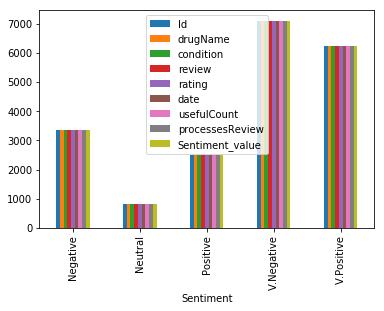

In [37]:
Sentiment_data.groupby('Sentiment').count().plot.bar()
plt.show()

## Plot Rating data from the dataframe

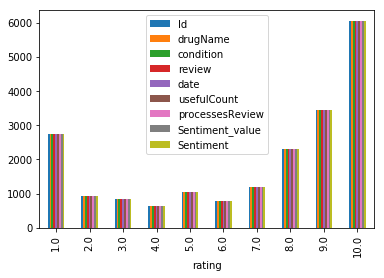

In [38]:
Sentiment_data.groupby('rating').count().plot.bar()
plt.show()

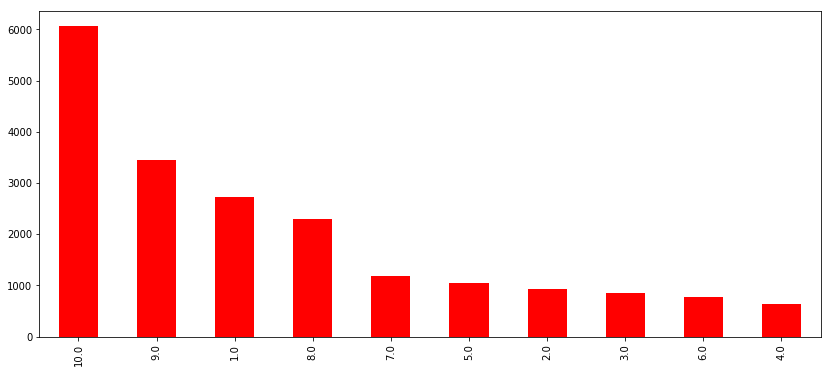

In [39]:
rating = Sentiment_data['rating'].value_counts().sort_values(ascending=False)
rating.plot(kind="bar",figsize=(14,6),fontsize = 10,color="red")

In [40]:
Sentiment_data.groupby('condition').rating.agg('max')

condition
ADHD                           10.0
Abnormal Uterine Bleeding      10.0
Acne                           10.0
Allergic Rhinitis              10.0
Anxiety                        10.0
Anxiety and Stress             10.0
Bacterial Infection            10.0
Bipolar Disorde                10.0
Birth Control                  10.0
Bowel Preparation              10.0
Chronic Pain                   10.0
Constipation                   10.0
Cough                          10.0
Depression                     10.0
Diabetes, Type 2               10.0
Emergency Contraception        10.0
Erectile Dysfunction           10.0
Generalized Anxiety Disorde    10.0
High Blood Pressure            10.0
Insomnia                       10.0
Irritable Bowel Syndrome       10.0
Major Depressive Disorde       10.0
Migraine                       10.0
Migraine Prevention            10.0
Muscle Spasm                   10.0
Nausea/Vomiting                10.0
Obesity                        10.0
Opiate Dependence 

In [41]:
Sentiment_data.loc[Sentiment_data.groupby('condition').rating.agg('idxmax')]

Id                                           drugName  \
Train 27     78563                                           Daytrana   
      176    67465                                            Provera   
      66     24139                                          Tretinoin   
      159   171741                                         Loratadine   
      115    65646                                        Propranolol   
      392    64773                                         Sertraline   
      245    88199                                        Clindamycin   
      7     102654                                       Aripiprazole   
      74    144224                                       Etonogestrel   
      832    86319  Magnesium sulfate / potassium sulfate / sodium...   
      517    93658                                           Morphine   
      454   125185                                           Dulcolax   
      1939  157444                                        Guaifenesin   
      11     75612                                     L-methylfolate   
      50    156544                                        Dulaglutide   
      197    26839                                         Ulipristal   
      76    216434                                         Sildenafil   
      960    28280                                            Lexapro   
      104   208641                            Amlodipine / olmesartan   
      21    231466                                          Trazodone   
      274   121006                                        Venlafaxine   
      161   126017                                            Viibryd   
      201   126666                                         Eletriptan   
      1881   91089                                              Botox   
      172    40586                                           Zanaflex   
      489    70391                                             Zofran   
      167   116064                                         Lorcaserin   
      416   118353                                         Naltrexone   
      35     80520                                              Mobic   
      32    204999                                            Toradol   
      79     64089                                         Sertraline   
      23     41928                                         Etanercept   
      755   145366                                          Zithromax   
      58    225508                                          Bupropion   
      300     3144                                     Nitrofurantoin   
      180   230126                                           Diflucan   
      380   145785                                             Qsymia   
      2056   92109                                             Lyrica   

                              condition  \
Train 27                           ADHD   
      176     Abnormal Uterine Bleeding   
      66                           Acne   
      159             Allergic Rhinitis   
      115                       Anxiety   
      392            Anxiety and Stress   
      245           Bacterial Infection   
      7                 Bipolar Disorde   
      74                  Birth Control   
      832             Bowel Preparation   
      517                  Chronic Pain   
      454                  Constipation   
      1939                        Cough   
      11                     Depression   
      50               Diabetes, Type 2   
      197       Emergency Contraception   
      76           Erectile Dysfunction   
      960   Generalized Anxiety Disorde   
      104           High Blood Pressure   
      21                       Insomnia   
      274      Irritable Bowel Syndrome   
      161      Major Depressive Disorde   
      201                      Migraine   
      1881          Migraine Prevention   
      172                  Muscle Spasm   
      489               Nausea/Vomiting   
      1